In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/colab datasets/chris_capstone3.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import ttest_ind  
%matplotlib inline
sns.set_style("whitegrid")
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.00,Yes,Travel_Rarely,1102.00,Sales,1.00,2.00,Life Sciences,1.00,1.00,2.00,Female,94.00,3.00,2.00,Sales Executive,4.00,Single,5993.00,19479.00,8.00,Y,Yes,11.00,3.00,1.00,80.00,0.00,8.00,0.00,1.00,6.00,4.00,0.00,5.00
1,49.00,No,Travel_Frequently,279.00,Research & Development,8.00,1.00,Life Sciences,1.00,2.00,3.00,Male,61.00,2.00,2.00,Research Scientist,2.00,Married,5130.00,24907.00,1.00,Y,No,23.00,4.00,4.00,80.00,1.00,10.00,3.00,3.00,10.00,7.00,1.00,7.00
2,37.00,Yes,Travel_Rarely,1373.00,Research & Development,2.00,2.00,Other,1.00,4.00,4.00,Male,92.00,2.00,1.00,Laboratory Technician,3.00,Single,2090.00,2396.00,6.00,Y,Yes,15.00,3.00,2.00,80.00,0.00,7.00,3.00,3.00,0.00,0.00,0.00,0.00
3,33.00,No,Travel_Frequently,1392.00,Research & Development,3.00,4.00,Life Sciences,1.00,5.00,4.00,Female,56.00,3.00,1.00,Research Scientist,3.00,Married,2909.00,23159.00,1.00,Y,Yes,11.00,3.00,3.00,80.00,0.00,8.00,3.00,3.00,8.00,7.00,3.00,0.00
4,27.00,No,Travel_Rarely,591.00,Research & Development,2.00,1.00,Medical,1.00,7.00,1.00,Male,40.00,3.00,1.00,Laboratory Technician,2.00,Married,3468.00,16632.00,9.00,Y,No,12.00,3.00,4.00,80.00,1.00,6.00,3.00,3.00,2.00,2.00,2.00,2.00


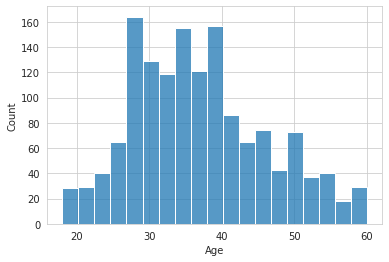

In [ ]:
df=df[df['Age']<1470]
sns.histplot(data=df,x='Age')

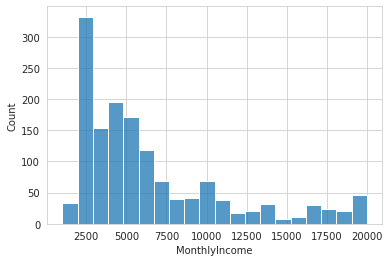

In [ ]:
f=df[df['MonthlyIncome']<1470]
sns.histplot(data=df,x='MonthlyIncome')

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1472.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.13,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1472
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1472 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1471 non-null   object 
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.00,Yes,Travel_Rarely,1102.00,Sales,1.00,2.00,Life Sciences,1.00,1.00,2.00,Female,94.00,3.00,2.00,Sales Executive,4.00,Single,5993.00,19479.00,8.00,Y,Yes,11.00,3.00,1.00,80.00,0.00,8.00,0.00,1.00,6.00,4.00,0.00,5.00
1,49.00,No,Travel_Frequently,279.00,Research & Development,8.00,1.00,Life Sciences,1.00,2.00,3.00,Male,61.00,2.00,2.00,Research Scientist,2.00,Married,5130.00,24907.00,1.00,Y,No,23.00,4.00,4.00,80.00,1.00,10.00,3.00,3.00,10.00,7.00,1.00,7.00
2,37.00,Yes,Travel_Rarely,1373.00,Research & Development,2.00,2.00,Other,1.00,4.00,4.00,Male,92.00,2.00,1.00,Laboratory Technician,3.00,Single,2090.00,2396.00,6.00,Y,Yes,15.00,3.00,2.00,80.00,0.00,7.00,3.00,3.00,0.00,0.00,0.00,0.00
3,33.00,No,Travel_Frequently,1392.00,Research & Development,3.00,4.00,Life Sciences,1.00,5.00,4.00,Female,56.00,3.00,1.00,Research Scientist,3.00,Married,2909.00,23159.00,1.00,Y,Yes,11.00,3.00,3.00,80.00,0.00,8.00,3.00,3.00,8.00,7.00,3.00,0.00
4,27.00,No,Travel_Rarely,591.00,Research & Development,2.00,1.00,Medical,1.00,7.00,1.00,Male,40.00,3.00,1.00,Laboratory Technician,2.00,Married,3468.00,16632.00,9.00,Y,No,12.00,3.00,4.00,80.00,1.00,6.00,3.00,3.00,2.00,2.00,2.00,2.00


# New Section

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   2
BusinessTravel              2
DailyRate                   2
Department                  2
DistanceFromHome            2
Education                   2
EducationField              2
EmployeeCount               2
EmployeeNumber              2
EnvironmentSatisfaction     2
Gender                      1
HourlyRate                  2
JobInvolvement              2
JobLevel                    2
JobRole                     2
JobSatisfaction             2
MaritalStatus               2
MonthlyIncome               2
MonthlyRate                 2
NumCompaniesWorked          2
Over18                      2
OverTime                    2
PercentSalaryHike           2
PerformanceRating           2
RelationshipSatisfaction    2
StandardHours               2
StockOptionLevel            2
TotalWorkingYears           2
TrainingTimesLastYear       2
WorkLifeBalance             2
YearsAtCompany              2
YearsInCurrentRole          2
YearsSince

In [ ]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1469,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1471,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
print('There are {} unique values in JobRole'.format(df['JobRole'].nunique()))

There are 9 unique values in JobRole


In [ ]:
print ('There are {} unique value in MontlyIncome'.format(df['MonthlyIncome'].nunique()))

There are 1349 unique value in MontlyIncome


In [ ]:
df.nunique()

Age                           44
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         3
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
df.shape

(1472, 35)

In [ ]:
JobLevel_counts = df['JobLevel'].value_counts()
JobLevel_counts.head() 

1.00    543
2.00    534
3.00    218
4.00    106
5.00     69
Name: JobLevel, dtype: int64

In [ ]:
JobRole_counts = df['JobRole'].value_counts()
JobRole_counts.head()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: JobRole, dtype: int64

In [ ]:
# find null value accross all columns in the dataframe
null_rows = df[df.isnull().any(axis=1)]
null_rows.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1471,36.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1472,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# find the null in the rows.
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1471 to 1472
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2 non-null      float64
 1   Attrition                 0 non-null      object 
 2   BusinessTravel            0 non-null      object 
 3   DailyRate                 0 non-null      float64
 4   Department                0 non-null      object 
 5   DistanceFromHome          0 non-null      float64
 6   Education                 0 non-null      float64
 7   EducationField            0 non-null      object 
 8   EmployeeCount             0 non-null      float64
 9   EmployeeNumber            0 non-null      float64
 10  EnvironmentSatisfaction   0 non-null      float64
 11  Gender                    1 non-null      object 
 12  HourlyRate                0 non-null      float64
 13  JobInvolvement            0 non-null      float64
 14  JobLevel

In [ ]:
# Print the original size of the DataFrame
print(df.size)

# Drop `NaN` rows
clean_df = df.dropna()

# Print the size of the modified DataFrame
print(clean_df.size)

51520
51450


In [ ]:
df['Age'].describe()

count   1472.00
mean      36.92
std        9.13
min       18.00
25%       30.00
50%       36.00
75%       43.00
max       60.00
Name: Age, dtype: float64

In [ ]:
clean_df['MonthlyIncome'].describe()

count    1470.00
mean     6502.93
std      4707.96
min      1009.00
25%      2911.00
50%      4919.00
75%      8379.00
max     19999.00
Name: MonthlyIncome, dtype: float64

In [ ]:
clean_df['YearsAtCompany'].describe()

count   1470.00
mean       7.01
std        6.13
min        0.00
25%        3.00
50%        5.00
75%        9.00
max       40.00
Name: YearsAtCompany, dtype: float64

In [ ]:
clean_df[['MonthlyIncome','YearsAtCompany']].describe()

,MonthlyIncome,YearsAtCompany
count,1470.00,1470.00
mean,6502.93,7.01
std,4707.96,6.13
min,1009.00,0.00
25%,2911.00,3.00
50%,4919.00,5.00
75%,8379.00,9.00
max,19999.00,40.00


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

# Research Question1: What factors are  making employees stay at the company?

*Hypothesis #1: There is a correlation between monthly income, total years at company and job level.



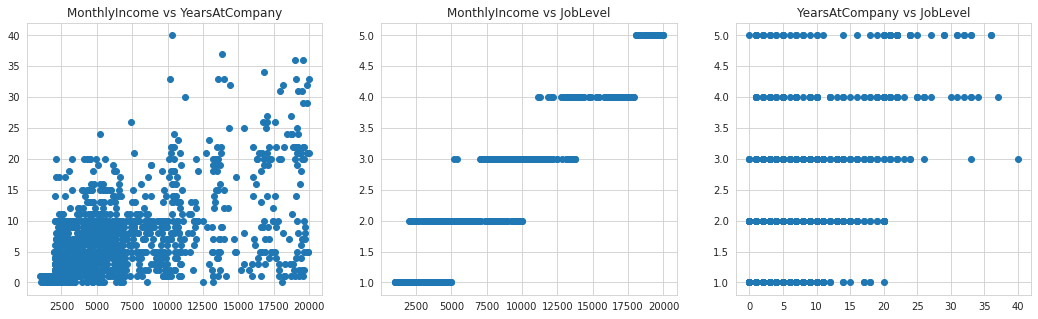

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(clean_df["MonthlyIncome"], clean_df["YearsAtCompany"])
plt.title("MonthlyIncome vs YearsAtCompany")

plt.subplot(1,3,2)
plt.scatter(clean_df["MonthlyIncome"], clean_df["JobLevel"])
plt.title("MonthlyIncome vs JobLevel")

plt.subplot(1,3,3)
plt.scatter(clean_df["YearsAtCompany"], clean_df["JobLevel"])
plt.title("YearsAtCompany vs JobLevel")

plt.show()

Summary hypothesis #1: There is a positive correlation between MonthlyIncome, YearsAtCompany and job level. If the monthly income increases, most employees are staying in the company. If the job level increase then employees monthly income increase. If the job level increase then the employees are most likely to staying at the company.

Hypothesis #2 There is no impact of employees Job Roles on staying at the same company long time

In [ ]:
clean_df.groupby("JobRole").mean()[["YearsAtCompany"]]


,YearsAtCompany
JobRole,
Healthcare Representative,8.37
Human Resources,5.33
Laboratory Technician,5.02
Manager,14.43
Manufacturing Director,7.60
Research Director,10.94
Research Scientist,5.11
Sales Executive,7.50
Sales Representative,2.92


In [ ]:
stats.ttest_ind(clean_df[clean_df.JobRole == "Manager"][[ "YearsAtCompany"]],
          clean_df[clean_df.JobRole == "Sales Representative"][["YearsAtCompany"]])

Ttest_indResult(statistic=array([10.03261788]), pvalue=array([3.75925741e-19]))

Summary hypothesis #2: The Hypothesis is rejected. The t-test shows that there is a significant difference in the mean(10.14024898) between YearsAtCompany for different Job Role types. In addition p-value is extremely small(3.75925741e-19) This means that employees in management roles (higher Job level=5) stay at the company more than those who are at entry-level job role (Low JobLevel =1) such as Sales Representative.